In [6]:
#Email Spam Detection

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("spam.csv", encoding="latin-1")[["v1", "v2"]]
df.columns = ["label", "message"]

# Label encoding
df["label"] = df["label"].map({"ham": 0, "spam": 1})

# Split data
X_train, X_test, y_train, y_test = train_test_split(df["message"],
                                                    df["label"],
                                                    test_size=0.2,
                                                    random_state=42)

# Text vectorization
tfidf = TfidfVectorizer(stop_words="english")
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9524663677130045
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



Average error: $0.53
Model explains 95.3% of price variation


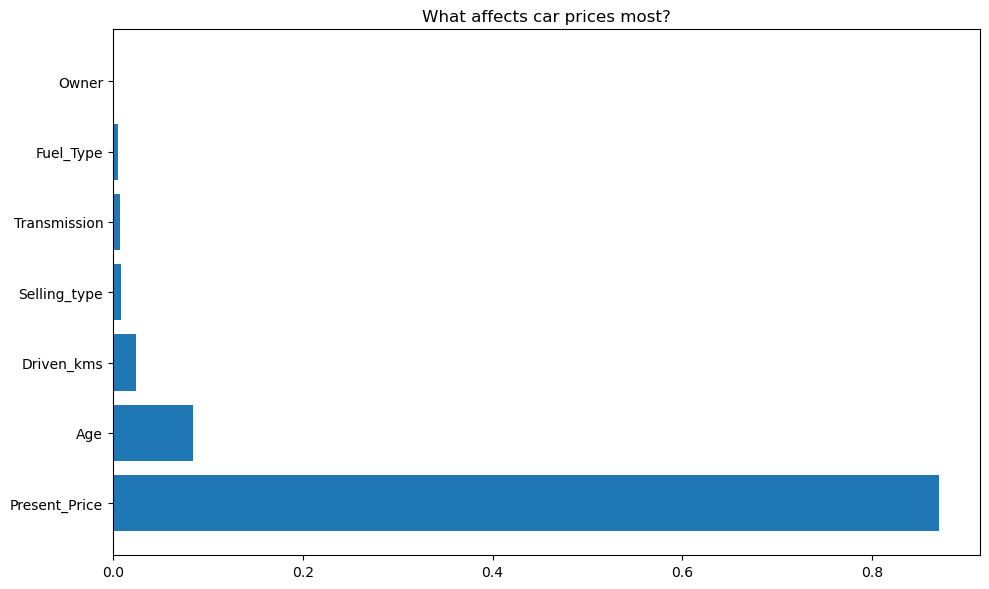

C:\Users\ASHRI\OneDrive\Documents\Custom Office Templates\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but RandomForestRegressor is expecting 7 features as input.

In [18]:
# Car Price Predictor - Easy and informative
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load and clean data
df = pd.read_csv('car data.csv')
df = df.dropna()

# Convert text to numbers
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:
    df[col] = LabelEncoder().fit_transform(df[col])

# Add car age feature
df['Age'] = 2023 - df['Year']

# Prepare features
X = df.drop(['Car_Name', 'Year', 'Selling_Price'], axis=1)
y = df['Selling_Price']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Average error: ${mean_absolute_error(y_test, y_pred):.2f}")
print(f"Model explains {r2_score(y_test, y_pred):.1%} of price variation")

# Feature importance
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance['Feature'], importance['Importance'])
plt.title('What affects car prices most?')
plt.tight_layout()
plt.show()

# Predict your car's value
your_car = [[2018, 8.5, 25000, 0, 1, 0, 0, 5]]  # Year, Present_Price, Kms, Fuel_Type, Seller_Type, Transmission, Owner, Age
print(f"Your car is worth: ${model.predict(your_car)[0]:.2f}")

In [15]:
#SALES PREDICTION USING MACHINE LEARNING

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Load Dataset ---
file_path = "Advertising.csv"   # Change to your dataset file
df = pd.read_csv(file_path)

print("Dataset loaded:", df.shape)

# --- Features (advertising, price, discount) ---
X = df.drop("Sales", axis=1)   # depends on your dataset column names
y = df["Sales"]

# --- Split Dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- Predict ---
y_pred = model.predict(X_test)

# --- Performance ---
print("\nSales Prediction Results")
print("MSE:", mean_squared_error(y_test, y_pred))

# --- Test on custom data ---
sample = X_test.iloc[0:1]
print("\nPredicted Sales for sample:", model.predict(sample))


Dataset loaded: (200, 5)

Sales Prediction Results
MSE: 3.1990044685889063

Predicted Sales for sample: [16.41227699]
